In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Notebook of examples for `generate.py`

Illustrating functions that generates null models or random networks that can be used for comparisons. 

#### Random unweighted, undirected binary network:

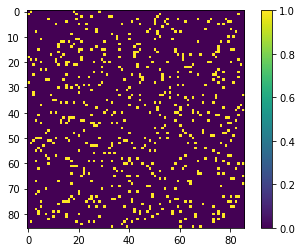

In [27]:
%matplotlib inline

def random_Cij_und(V, E):
    indmat = np.triu(np.logical_not(np.eye(V)))
    i = np.asarray(indmat.ravel().nonzero()) #linear indices of upper triangle elements
    RP = np.random.permutation(i.shape[1])
    random_indices = i[:,RP] # vertices randomly permuted
    
    # select E edges out of random_indices:
    Cij = np.zeros([V,V])
    V_indices = np.squeeze(np.asarray(np.unravel_index(random_indices, indmat.shape)))
    Cij[V_indices[0,0:E], V_indices[1,0:E]] = 1 # every selected Edge gets 1
    Cij = Cij + np.transpose(Cij)
    return Cij

randCij = random_Cij_und(86,300)
plt.figure('Random Undirected Binary Connectivity')
plt.imshow(randCij)
plt.colorbar()

#### Random unweighted, directed binary network:

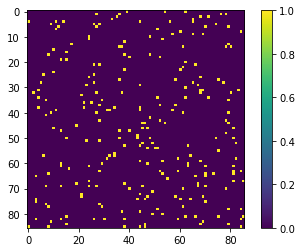

In [3]:
def random_Cij_dir(V, E):
    indmat = np.logical_not(np.eye(V))
    i = np.asarray(indmat.ravel().nonzero()) #linear indices of upper triangle elements
    RP = np.random.permutation(i.shape[1])
    random_indices = i[:,RP] # vertices randomly permuted
    
    # select E edges out of random_indices:
    Cij = np.zeros([V,V])
    V_indices = np.squeeze(np.asarray(np.unravel_index(random_indices, indmat.shape)))
    Cij[V_indices[0,0:E], V_indices[1,0:E]] = 1 # every selected Edge gets 1
    return Cij

randCij_dir = random_Cij_dir(86,250)
plt.figure('Random Directed Connectivity')
plt.imshow(randCij_dir)
plt.colorbar()

#### Add weights to binary network:

You can add weight this binary random network:

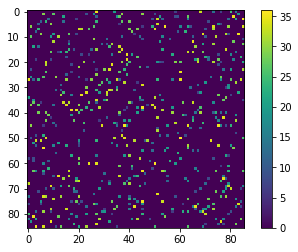

In [4]:
def add_weights(Cij, u, s):
    # find vertices in upper triangle:
    inds = np.squeeze(np.asarray(np.where(np.triu(Cij)))) # find upper triangle vertices
    # create new weighted Cij
    wCij = np.zeros([86,86])
    # assign value to inds based on mean u and variance s
    for i in np.arange(0,inds.shape[1]):
        wCij[inds[0,i],inds[1,i]] = u+np.random.random(1)*s
    
    wCij = wCij + np.transpose(wCij)
    return wCij

rand_wCij = add_weights(randCij,6,30)
plt.figure('Weighted Random Connectivity')
plt.imshow(rand_wCij)
plt.colorbar()

#### Distance weighted network:

Sample distance metric based on a distance matrix input, and construct a weighted network based on sampled values.

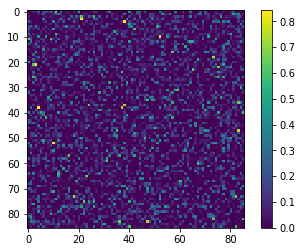

In [6]:
dist_mat = np.genfromtxt('../data/mean80_fiberlength.csv',delimiter=",",skip_header=0)

def exp_neg_dist_Cij(distance_matrix):
    negdist = np.exp(-distance_matrix)
    negdist = negdist - np.diag(np.diag(negdist))

    V = len(negdist) #number of vertices
    E = np.floor(np.count_nonzero(negdist)/2).astype(int) #number of edges

    linear_indices = np.squeeze(np.asarray(np.where((negdist < 1) & (negdist > 0.0001))))# get rid of extremes
    dist_distribution = negdist[linear_indices[0,:],linear_indices[1,:]]

    # Sample from dist_distribution into a matrix:
    triu_indices = np.triu(np.logical_not(np.eye(V)))
    i = np.asarray(triu_indices.ravel().nonzero()) #linear indices of upper triangle elements

    RP = np.random.permutation(i.shape[1]) # randomly perm the indices
    random_indices = i[:,RP] # vertices randomly permuted
    random_indices = np.squeeze(np.asarray(np.unravel_index(random_indices, negdist.shape)))

    dist_wCij = np.zeros([V,V]) # V-vertices matrix
    for n in np.arange(0,E):
        dist_wCij[random_indices[0,n],random_indices[1,n]] = np.random.choice(dist_distribution, replace = False)
    
    dist_wCij = dist_wCij + np.transpose(dist_wCij)
    return dist_wCij

dist_wCij = exp_neg_dist_Cij(dist_mat)
plt.imshow(dist_wCij)
plt.colorbar()

#### Generate distance matrix based on given random connectome

sample distance values randomly from a template connectome (HCP)

In [25]:
triu_inds = np.triu(randCij)
i = np.asarray(triu_inds.nonzero())
i.shape

(2, 300)

In [17]:
dist_dist = np.asarray(np.nonzero(np.triu(dist_mat)))
dist_mat[dist_dist[0,:],dist_dist[1,:]]

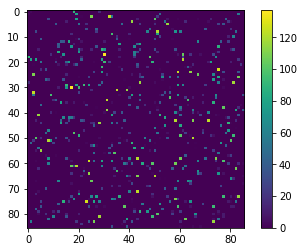

In [29]:
def distance_matrix(C, distances):
    V = len(C) # number of vertices
    Drand = np.zeros([V,V])
    
    # find index of upper triangle where edges have non-zero value:
    triu_inds = np.triu(C)
    lin_i = np.asarray(triu_inds.nonzero())
    
    # create distance distribution to sample from
    dist_ind = np.asarray(np.nonzero(np.triu(distances)))
    dist_dist = distances[dist_ind[0,:],dist_ind[1,:]]
    
    # assign randomly sampled values to lin_i
    for i in np.arange(0,lin_i.shape[1]):
        Drand[lin_i[0,i],lin_i[1,i]] = np.random.choice(dist_dist,replace = False)
    
    Drand = Drand + np.transpose(Drand)
    return Drand

dist_rand = distance_matrix(randCij, dist_mat)
plt.imshow(dist_rand)
plt.colorbar()